In [1]:
#All imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import style
import matplotlib.cm as cm, matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from datetime import datetime, timedelta
import os

%matplotlib inline

In [2]:
#Read all files and append to df
data_path = 'Datasets/'
dirListing = os.listdir(data_path)
df = pd.DataFrame()
for item in dirListing:
    tempdf = pd.read_csv(data_path+item)
    tempdf.dropna(inplace = True) 
    df = df.append(tempdf)

In [3]:
#replace _ to -
#print(df["date"])
df["date"] = df["date"].replace(r"_", "-", regex=True)
#print(df["date"])

In [4]:
#List unique date values
#df.date.unique()

In [5]:
#Split date for processing
new = df["date"].str.split("-", expand = True)
df["year"] = new[0]
df["month"] = new[1]
df["day"] = new[2]

In [6]:
#check for missing values
#df.isnull().sum()

In [7]:
#show descriptive statistics
#df.describe()

In [8]:
#Converting the "scheduled_time" and "actual_time" columns to datetimes
df['scheduled_time'] = pd.to_datetime(df['scheduled_time']) 
df['actual_time'] = pd.to_datetime(df['actual_time'])

In [9]:
#The cumulative delay for a train is simply the "delay" value for the last stop for the train:
print('The cumulative delay for a train is simply the "delay" value for the last stop for the train:')
cumu_delay = df.groupby(['date' , 'train_id']).last()
cumu_delay.head(2)

The cumulative delay for a train is simply the "delay" value for the last stop for the train:


stop_sequence                from  from_id           to  \
date       train_id                                                            
2018-03-01 0041               25.0           Otisville    113.0  Port Jervis   
           0042               18.0  Secaucus Lower Lvl  38174.0      Hoboken   

                     to_id      scheduled_time         actual_time  \
date       train_id                                                  
2018-03-01 0041      123.0 2018-03-02 03:10:00 2018-03-02 03:17:00   
           0042       63.0 2018-03-01 06:12:00 2018-03-01 06:12:00   

                     delay_minutes     status              line        type  \
date       train_id                                                           
2018-03-01 0041                7.0  estimated  Bergen Co. Line   NJ Transit   
           0042                0.0  estimated  Bergen Co. Line   NJ Transit   

                    reason  year month day  
date       train_id                         
2018-03-01 0041        NaN  2018    03  01  
           0042        NaN  2018    03  01

In [10]:
ontime_trains = cumu_delay[(cumu_delay['delay_minutes']<=0)]
ontime_trains_count = ontime_trains['delay_minutes'].count()

In [11]:
# function to produce more beautiful pie charts with matplotlib
def pie_chart(fractions, #values for the wedges
              labels, #labels for the wedges
              title = '', #title of the pie chart
              cm_name = 'Pastel1', #name of the matplotlib colormap to use
              autopct = lambda x: str(round(x, 1)) + '%', #format the value text on each pie wedge
              labeldistance = 1.05, #where to place wedge labels in relation to pie wedges
              shadow = True, #shadow around the pie
              startangle = 90, #rotate 90 degrees to start the top of the data set on the top of the pie
              edgecolor = 'w', #color of pie wedge edges
              width = 8, #width of the figure in inches
              height = 8, #height of the figure in inches
              grouping_threshold = None, #group all wedges below this value into one 'all others' wedge
              grouping_label = None): #what to label the grouped wedge
    
    # if the user passed a threshold value, group all fractions lower than it into one 'misc' pie wedge
    if not grouping_threshold==None:
        
        # if user didn't pass a label, apply a default text
        if grouping_label == None:
            grouping_label = 'Others'


        # group all other rows below the cut-off value
        all_others = pd.Series(fractions[~row_mask].sum())
        all_others.index = [grouping_label]

       
    
    # get the color map then pull 1 color from it for each pie wedge we'll draw
    color_map = cm.get_cmap(cm_name)
    num_of_colors = len(fractions)
    colors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])
    
    # create the figure and an axis to plot on
    fig, ax = plt.subplots(figsize=[width, height])
    
    # plot the pie
    wedges = ax.pie(fractions, 
                    labels = labels, 
                    labeldistance = labeldistance,
                    autopct = autopct,
                    colors = colors,
                    shadow = shadow, 
                    startangle = startangle)
    
    # change the edgecolor for each wedge
    for wedge in wedges[0]:
        wedge.set_edgecolor(edgecolor)
    
    # set the title and show the plot
    ax.set_title(title)
    plt.show()

In [12]:
#List unique year values
years = df.year.unique()

#List unique month values
months = df.month.unique()

year_month = []
yeardf = pd.DataFrame()
monthdf = pd.DataFrame()
df_by_year_month = {}
delayed_trains_count = []
ontime_trains_count = []
cancelled_trains_count = []
statuses_count = []
departed_count = []
estimated_count = []
cancelled_count = []
#Filter based on months
for year in years:
    yeardf = df.loc[df['year'] == year]
    for month in months:
        monthdf = yeardf.loc[yeardf['month'] == month]
        year_month.append(year+"_"+month)
        delayed_trains = monthdf[(monthdf['delay_minutes']>0)]
        ontime_trains = monthdf[(monthdf['delay_minutes']<=0)]
        cancelled_trains = monthdf[(monthdf['status'] == 'cancelled')]
        delayed_trains_count.append(delayed_trains['delay_minutes'].count())
        ontime_trains_count.append(ontime_trains['delay_minutes'].count())
        cancelled_trains_count.append(cancelled_trains['status'].count())
        statuses_count.append(monthdf['status'].value_counts())
        departed = monthdf[monthdf['status'] == 'departed'].status.count()
        departed_count.append(departed)
        estimated = monthdf[monthdf['status'] == 'estimated'].status.count()
        estimated_count.append(estimated)
        cancelled = monthdf[monthdf['status'] == 'cancelled'].status.count()
        cancelled_count.append(cancelled)
        df_by_year_month[len(year_month)-1] = monthdf

Pie chart for delay report per month


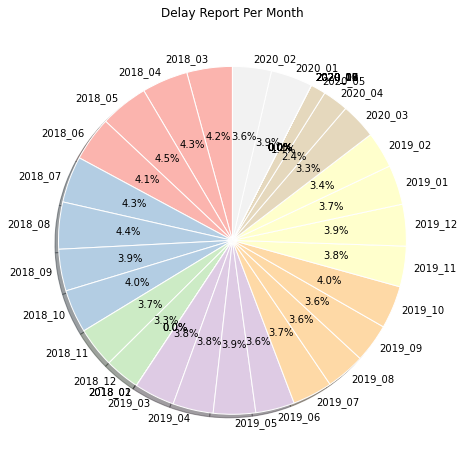

In [13]:
#Pie chart for delay report per month
print('Pie chart for delay report per month')
pie_chart(fractions = delayed_trains_count,
          labels = year_month,
          title = 'Delay Report Per Month')

OnTime vs Delayed vs Cancelled


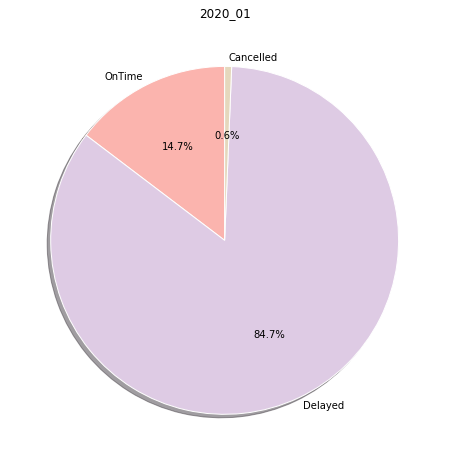

In [22]:
#OnTime vs Delayed vs Cancelled
print('OnTime vs Delayed vs Cancelled')
index = year_month.index('2020_01')
delay_data = [ontime_trains_count[index], delayed_trains_count[index] , cancelled_trains_count[index]]
labels = 'OnTime', 'Delayed' , 'Cancelled'
pie_chart(fractions = delay_data,
          labels = labels,
          title = year_month[index])

Statuses of Trains


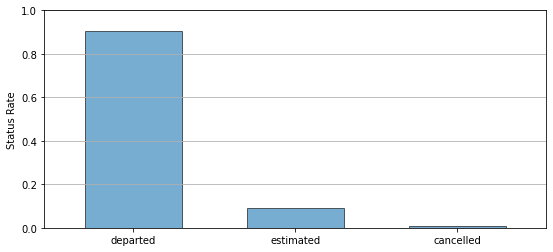

In [23]:
#Statuses of Trains
print('Statuses of Trains')
sum_statuses = departed_count[index] + estimated_count[index] + cancelled_count[index]
statuses = statuses_count[index] / sum_statuses
#print(statuses)
ax = statuses.plot(kind='bar', figsize=[9,4],width=0.6,alpha=0.6,edgecolor='k', grid=False, ylim=[0, 1])

ax.set_xticklabels(statuses.index, rotation=0, rotation_mode='anchor')
ax.yaxis.grid(True)
ax.yaxis.grid(True)
   
ax.set_ylabel('Status Rate')

plt.show()

In [16]:
#Average Delay During a Week
print('Average Delay During a Week')
df['date'] = pd.to_datetime(df['date'])
df['day_of_weeks'] = df['date'].dt.day_name()
week_av_delay = df.groupby(df['day_of_weeks'] ,as_index = False )['delay_minutes'].mean()
week_av_delay['num'] = [5,1,6,7,4,2,3]
week_av_delay

Average Delay During a Week


,day_of_weeks,delay_minutes,num
0,Friday,4.253865,5
1,Monday,4.112564,1
2,Saturday,4.713133,6
3,Sunday,4.289742,7
4,Thursday,4.051170,4
5,Tuesday,4.047925,2
6,Wednesday,4.051516,3


Weekly average delay chart


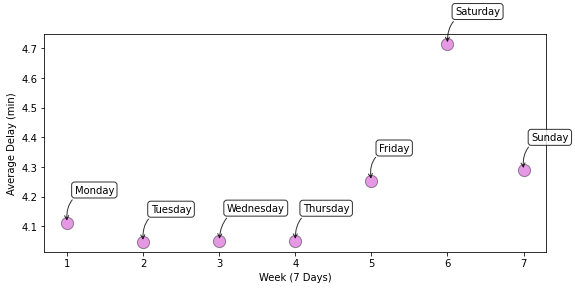

In [24]:
#Weekly average delay chart
print('Weekly average delay chart')
fig, ax = plt.subplots()
fig.set_size_inches(9, 4)
week_av_delay_scatter = ax.scatter(x = week_av_delay['num'], y = week_av_delay['delay_minutes'],
                                   c='m', edgecolor='k', alpha=.4, s=150)


# set  axis labels

ax.set_xlabel('Week (7 Days)')
ax.set_ylabel('Average Delay (min)')

# annotate
bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
annotate_day_of_weeks= lambda row: ax.annotate(row['day_of_weeks'], 
                                          xy=(row['num'], row['delay_minutes']),
                                          xytext=(row['num'] + 0.1, row['delay_minutes'] + 0.1),
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
week_av_delay.apply(annotate_day_of_weeks, axis=1)
    
plt.show()

Most Delayed Stations


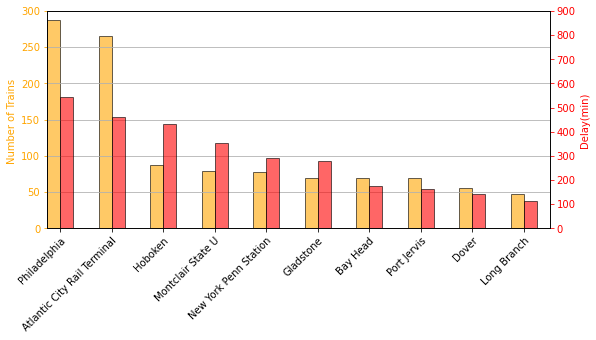

In [18]:
#Most Delayed Stations
print('Most Delayed Stations')
bar_width = 0.25
error_config = {'ecolor': '0.3'}

stations = df.groupby(['train_id']).last()
stations.head(2)

stations_to_usage = stations['to'].value_counts().head(10)

stations_to_cumu_delay = stations.groupby('to')['delay_minutes'].sum().sort_values(ascending=False).head(10)

stations_stop_sequence = stations.groupby('to')['stop_sequence'].sum().sort_values(ascending=False).head(10)

ax = stations_to_usage.plot(kind='bar', figsize=[9, 9], width= bar_width, alpha=0.6, position = 1,
                    color='orange', edgecolor='k', grid=False, ylim=[0, 300])

ax.set_xticklabels(stations_to_usage.index, rotation=45, rotation_mode='anchor', ha='right')
ax.yaxis.grid(True)
   
ax.set_ylabel('Number of Trains ' , color='orange')
ax.tick_params('y', colors='orange')

ax2 = ax.twinx()

ax2 =stations_to_cumu_delay.plot( kind = 'bar' , figsize=[9, 4], width= bar_width, position = 0, alpha=0.6, 
                    color='r', edgecolor='k', grid=False, ylim=[0, 900] , error_kw=error_config,
                 label='Delay(min)')

ax2.set_xticklabels(stations_to_cumu_delay.index, rotation=45, rotation_mode='anchor', ha='right')



ax2.set_ylabel('Delay(min)' , color='r')
ax2.tick_params('y', colors='r')

Numbers of Stops have a Direct Relationship with Delay


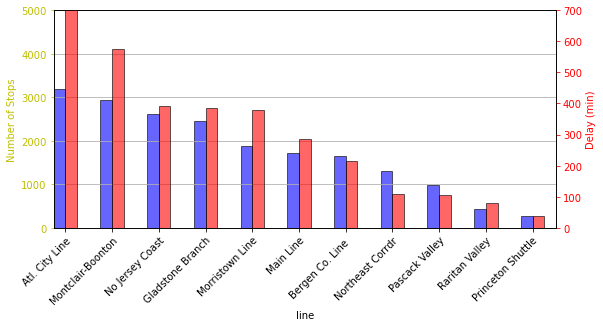

In [19]:
#Numbers of Stops have a Direct Relationship with Delay
print('Numbers of Stops have a Direct Relationship with Delay')
lines_stop_sequence = stations.groupby('line')['stop_sequence'].sum().sort_values(ascending=False)

lines_cumu_delay = stations.groupby('line')['delay_minutes'].sum().sort_values(ascending=False)

ax = lines_stop_sequence.plot(kind='bar', figsize=[9, 9], width= bar_width, alpha=0.6, position = 1,
                    color='b', edgecolor='k', grid=False, ylim=[0, 5000])

ax.set_xticklabels(lines_stop_sequence.index, rotation=45, rotation_mode='anchor', ha='right')
ax.yaxis.grid(True)
   
ax.set_ylabel('Number of Stops' , color='y')
ax.tick_params('y', colors='y')

ax2 = ax.twinx()

ax2 =lines_cumu_delay.plot( kind = 'bar' , figsize=[9, 4], width= bar_width, position = 0, alpha=0.6, 
                    color='r', edgecolor='k', grid=False, ylim=[0, 700] , error_kw=error_config,
                 label='Delay (min)')

ax2.set_xticklabels(lines_cumu_delay.index, rotation=45, rotation_mode='anchor', ha='right')

ax2.set_ylabel('Delay (min)' , color='r')
ax2.tick_params('y', colors='r')

Number of TRIPS has a Direct Relationship with Delay the same as lines


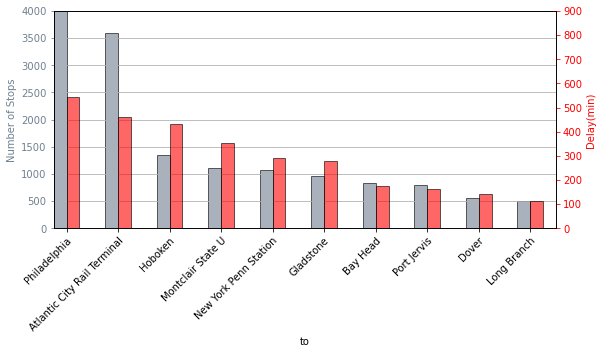

In [20]:
#Number of TRIPS has a Direct Relationship with Delay the same as lines
print('Number of TRIPS has a Direct Relationship with Delay the same as lines')
ax = stations_stop_sequence.plot(kind='bar', figsize=[9, 9], width= bar_width, alpha=0.6, position = 1,
                    color='slategrey', edgecolor='k', grid=False, ylim=[0, 4000])

ax.set_xticklabels(stations_stop_sequence.index, rotation=45, rotation_mode='anchor', ha='right')
ax.yaxis.grid(True)
   
ax.set_ylabel('Number of Stops' , color='slategrey')
ax.tick_params('y', colors='slategrey')

ax2 = ax.twinx()

ax2 =stations_to_cumu_delay.plot( kind = 'bar' , figsize=[9, 4], width= bar_width, position = 0, alpha=0.6, 
                    color='r', edgecolor='k', grid=False, ylim=[0, 900] , error_kw=error_config,
                 label='Delay(min)')

ax2.set_xticklabels(stations_to_cumu_delay.index, rotation=45, rotation_mode='anchor', ha='right')

ax2.set_ylabel('Delay(min)' , color='r')
ax2.tick_params('y', colors='r')